In [ ]:
# default_exp activations

# Activations

> Additional activation functions that aren't built into TensorFlow.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
# export
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

In [ ]:
%matplotlib inline

In [ ]:
# export
def mish(x):
    """Mish: A Self Regularized Non-Monotonic Neural Activation Function
    
    https://arxiv.org/pdf/1908.08681v1.pdf
    
    Parameters
    ----------
    x: tf.Tensor[float]
        Input tensor.
    
    Returns
    -------
    tf.Tensor[float]: Tensor of same shape as input x.
    """
    return x * K.tanh(K.softplus(x))

In [ ]:
def d_mish(x):
    """Mish backward pass. Used for testing mish functionality."""
    w = K.exp(3*x) + 4*K.exp(2*x) + (4*x+6)*K.exp(x) + 4*x + 4
    d = 1 + (K.exp(x) + 1) ** 2
    return K.exp(x) * w / d**2

In [ ]:
def plot_activations(z, a, mode='scatter', **kwargs):
    """Plot an input tensor and its corresponding activations.  Both tensors
    will be flattened for plotting.
    
    Parameters
    ----------
    z: tf.Tensor
        Tensor containing values to plot on the x axis (we can often think of
        this as the output of a linear layer, where z=f(x) and a=mish(z)).
    a: tf.Tensor
        Tensor containing values to plot on y axis.
    mode: str
        'scatter' for scatter plot or 'plot' for line plot.
    kwargs: Values to be passed to the matplotlib plotting function, such as 
        's' when in 'scatter' mode or 'lw' in 'plot' mode.
        
    Returns
    -------
    None
    """
    plt_func = getattr(plt, mode)
    kwargs = kwargs or {}
    if mode == 'scatter' and not kwargs:
        kwargs = {'s': .75}
    plt_func(z.numpy().flatten(), a.numpy().flatten(), **kwargs)
    plt.axvline(0, lw=.5, alpha=.5)
    plt.axhline(0, lw=.5, alpha=.5)
    plt.show()

In [ ]:
x = tf.range(-5, 5, .05)
a = mish(x)
d = d_mish(x)

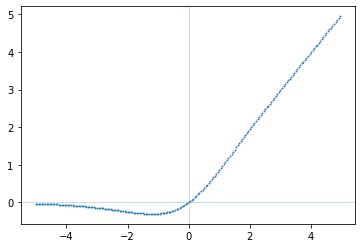

In [ ]:
plot_activations(x, a)

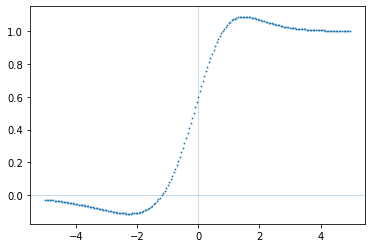

In [ ]:
plot_activations(x, d)

Next we test the mish activation with TensorFlow's built-in gradient calculator.

In [ ]:
with tf.GradientTape() as t:
    t.watch(x)
    y = mish(x)

dy_dx = t.gradient(y, x)

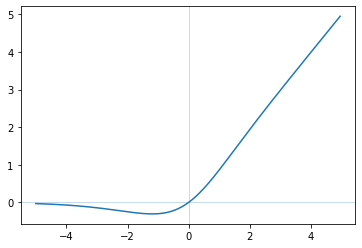

In [ ]:
plot_activations(x, y, 'plot')

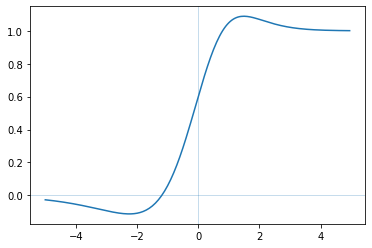

In [ ]:
plot_activations(x, dy_dx, 'plot')

To test that the activation works correctly when passed to a layer, we create two linear layers with shared weights and zero bias, where the only difference is the first has no activation and the second uses mish.

In [ ]:
fc = Dense(100, activation=None)
fc2 = Dense(100, activation=mish)

# Initialize weight matrices so fc2 lets us set weights.
_ = fc(x)
_ = fc2(x)
fc2.set_weights(fc.get_weights())

In [ ]:
assert (fc.kernel.numpy() == fc2.kernel.numpy()).all()

In [ ]:
assert (fc.bias.numpy() == fc2.bias.numpy()).all()

Then we pass x through the first linear layer followed by the mish activation. The outputs should look like the activations we plotted above.

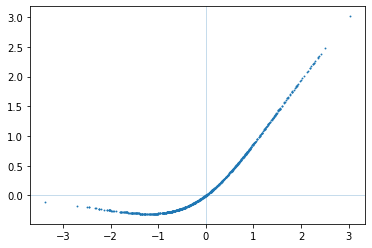

In [ ]:
z = fc(x)
a = mish(z)
plot_activations(z, a)

They should also be equivalent to the activations computed by the second linear layer.

In [ ]:
assert (a.numpy() == fc2(x).numpy()).all()